# 1. Importing essential liabraries 

In [163]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

# 2. Importing DataSet

In [164]:
df=pd.read_csv(r"C:\Users\91777\Downloads\Data Science\DataSet\Housing.csv")

In [165]:
df.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


In [166]:
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

# 3. Algorithm selection 
- In this dataset we can have to train our model to determine the price of house 
- as Independent variables are numerical and Dependent variables is in continuous format we ___can apply logistic Regression Algorithm___ 
- Though object is in object dtype we can extract pincode from it to make it numerical

# 4. EDA (Exploratory Data Analysis)
- will help in understanding the data 
- dtypes of predictors 
- whether it contains any null values 
- presence of outliers etc

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [168]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [169]:
col_nm=list(df.columns)
col_nm.remove("Address")
col_nm.remove("Price")

In [170]:
col_nm

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population']

# Visualising Data

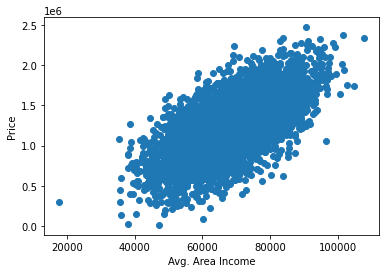

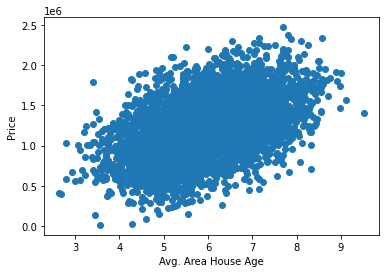

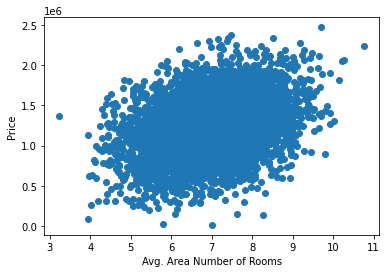

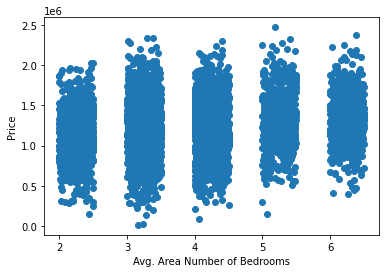

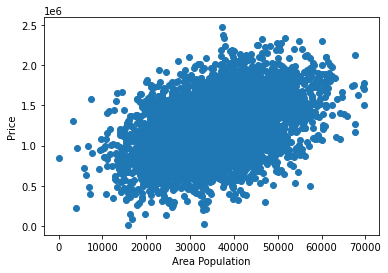

In [171]:
for i in col_nm:
    plt.scatter(df[i],df["Price"])
    plt.xlabel(i)
    plt.ylabel("Price")
    plt.show()

- from above scatterplot we can observe that there is a positive correlation between all the predictors and output variables except no. of bedrooms as it is a categorical type 

- now we will plot boxplot to check for outliers 

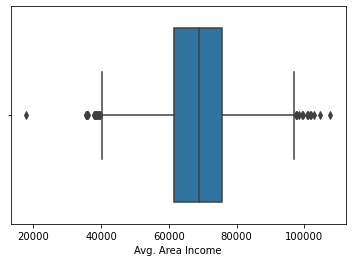

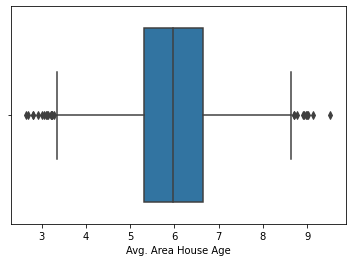

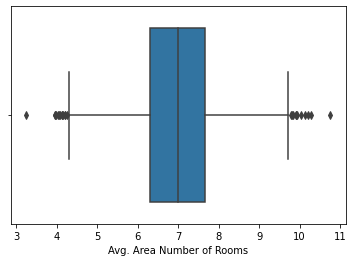

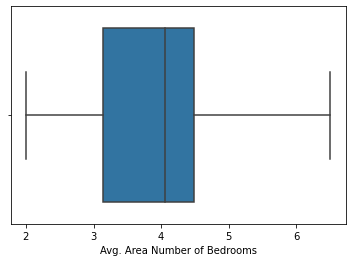

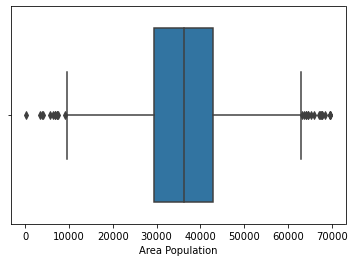

In [172]:
for i in col_nm:
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

In [173]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


- we can see that outliers are present in our data 
- outliers need to be handeled so as to maintain the statistcal integrity 
- we will use ___IQR___ menthod to handle outliers

In [174]:
col_nm.remove('Avg. Area Number of Bedrooms')
col_nm

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Area Population']

In [175]:
for i in col_nm:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    df=df[(df[i]>(Q1-1.5*IQR)) & (df[i]<(Q3+1.5*IQR))]

In [176]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

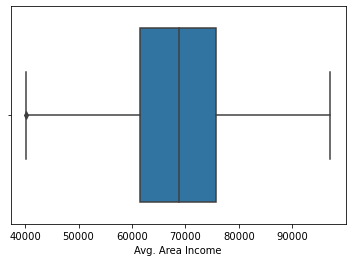

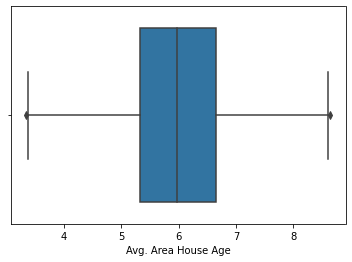

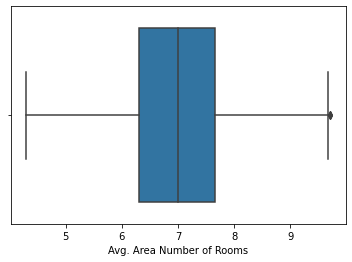

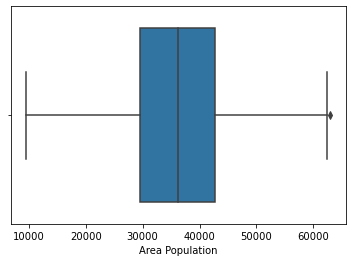

In [177]:
for i in col_nm:
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

# Separating predictors and output variables 

In [178]:
X=df.drop(["Price","Address"],axis=1)
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [179]:
y=df.Price
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 4889, dtype: float64

- Now after EDA our data is ready for training 

# Model training

- for this we use sklearn liabrary

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=10)

In [181]:
LG_Reg=LinearRegression()
LG_Reg

LinearRegression()

In [182]:
LG_Reg.fit(X_train,y_train)

LinearRegression()

In [183]:
y_pred=LG_Reg.predict(X_test)
y_pred

array([ 642191.8845565 ,  746097.33145009,  742945.52499846, ...,
       1067650.40566454, 1730238.82105139, 1110747.62148935])

In [190]:
y_test

4876    5.812001e+05
3271    9.442889e+05
4699    7.188694e+05
4853    1.587623e+06
2696    1.876497e+06
            ...     
699     1.625703e+06
587     6.610434e+05
4712    1.191262e+06
3344    1.914073e+06
1196    1.115549e+06
Name: Price, Length: 1223, dtype: float64

# Checking the Accuracy

In [184]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score

In [185]:
R2_testing=r2_score(y_test,y_pred)
R2_testing

0.9174113316073549

In [186]:
X_test.shape

(1223, 5)

In [187]:
n=X_test.shape[0]
p=X_test.shape[1]
adj_r2=1-(((1-R2_testing)*(n-1))/(n-p-1))

In [188]:
adj_r2

0.9170720190831452